In [1]:
import pandas as pd
import sklearn
import csv
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import plotly.express as ex
import seaborn as sns
from scipy.stats import chi2
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import plotly.graph_objs as go
from plotly.subplots import make_subplots

In [2]:

excel_file_path = '/kaggle/input/e-shop/E_commerce_dataset.xlsx'
df = pd.read_excel(excel_file_path)

In [3]:
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [4]:
df

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,55626,0,10.0,Computer,1,30.0,Credit Card,Male,3.0,2,Laptop & Accessory,1,Married,6,0,18.0,1.0,2.0,4.0,150.71
5626,55627,0,13.0,Mobile Phone,1,13.0,Credit Card,Male,3.0,5,Fashion,5,Married,6,0,16.0,1.0,2.0,NaN,224.91
5627,55628,0,1.0,Mobile Phone,1,11.0,Debit Card,Male,3.0,2,Laptop & Accessory,4,Married,3,1,21.0,1.0,2.0,4.0,186.42
5628,55629,0,23.0,Computer,3,9.0,Credit Card,Male,4.0,5,Laptop & Accessory,4,Married,4,0,15.0,2.0,2.0,9.0,178.90


As shown from the records above dataset includes a range of features from customer demographics to their purchasing behaviors. Key attributes include:

* Customer Demographics: Gender, City Tier, Marital Status.
* Shopping Preferences: Preferred Login Device, Preferred Payment Mode, Preferred Order Categories.
* Engagement Metrics: Hours Spent on App, Number of Devices Registered, Satisfaction Score.
*Transactional Behavior: Order Amount Hike from Last Year, Number of Addresses, Frequency of Coupon Usage

In [5]:
#Next im checking for any dupicate values. 
#The return is 0 indicating that we do no have any duplicates in our dataset. 

df.duplicated().sum()

0

In [6]:
#Here im rewview the datatypes contained in the dataset 
data_types = df.dtypes
print(data_types)

CustomerID                       int64
Churn                            int64
Tenure                         float64
PreferredLoginDevice            object
CityTier                         int64
WarehouseToHome                float64
PreferredPaymentMode            object
Gender                          object
HourSpendOnApp                 float64
NumberOfDeviceRegistered         int64
PreferedOrderCat                object
SatisfactionScore                int64
MaritalStatus                   object
NumberOfAddress                  int64
Complain                         int64
OrderAmountHikeFromlastYear    float64
CouponUsed                     float64
OrderCount                     float64
DaySinceLastOrder              float64
CashbackAmount                 float64
dtype: object


In [7]:
#Due to the dataset being limited i dont wish to drop any row if a missing value exist. 
#Insted im repalcing 0 values with the medina inorder to account for less varaince than for example the mean. 

for colum in df.columns:
    if df[colum].isnull().sum()>0:
        df[colum].fillna(df[colum].median(),inplace=True)
df.isnull().sum()

/tmp/ipykernel_18/1593097440.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[colum].fillna(df[colum].median(),inplace=True)
/tmp/ipykernel_18/1593097440.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usi

CustomerID                     0
Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64

Having preformed a basic review of the data and mutating missing values i move on with the data analysis.

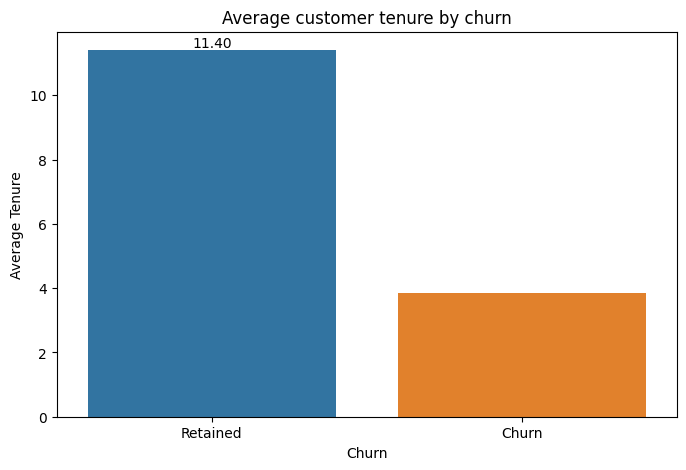

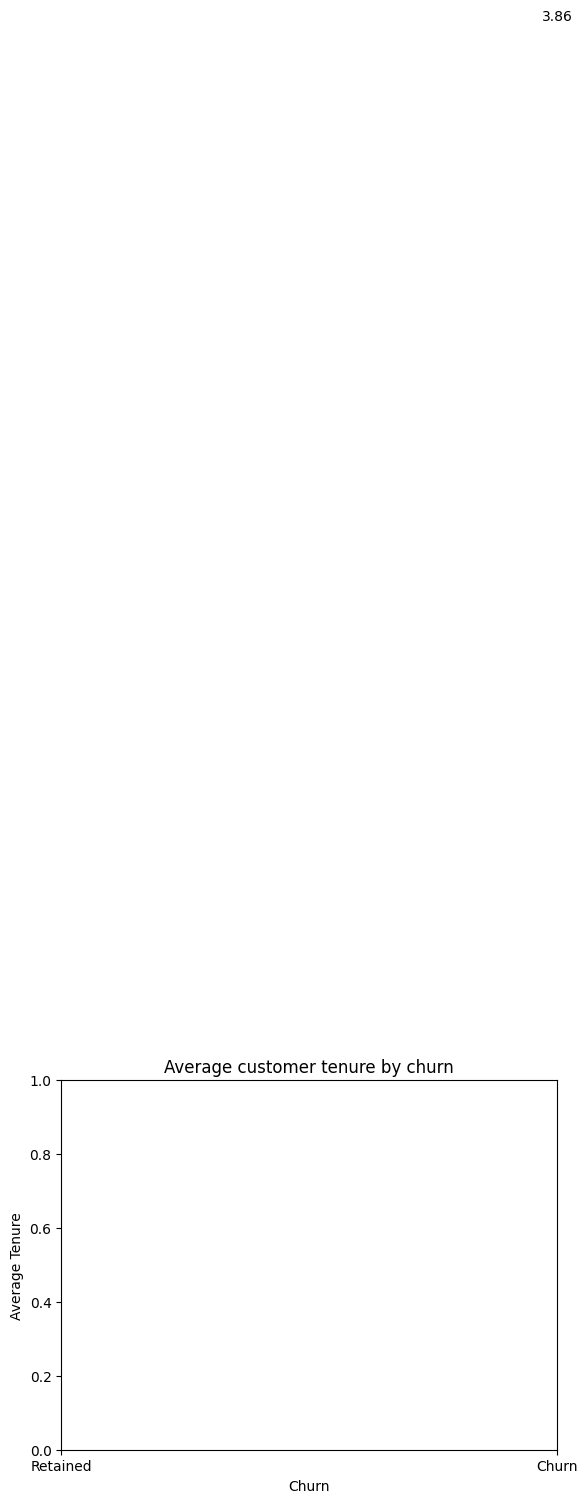

In [8]:
avg_tenure=df.groupby('Churn')['Tenure'].mean()
plt.figure(figsize=(8,5))
sns.barplot(x=avg_tenure.index,y=avg_tenure.values)
for index, value in enumerate(avg_tenure):
    plt.text(index,value, f'{value:.2f}', ha='center', va='bottom')
    plt.title('Average customer tenure by churn')
    plt.xlabel('Churn')
    plt.ylabel('Average Tenure')
    plt.xticks([0,1],['Retained','Churn'])
    plt.show()

# The analysis of customer tenure in relation to churn reveals.

* Customers who were retained (Churn = 0) have an average tenure of approximately 11.40.
* customers who churned (Churn = 1) have a significantly lower average tenure of around 3.86.
* The bar chart visually illustrates this difference, clearly showing that customers who stay with the service tend to have a longer tenure, while those who leave (churn) typically do so after a shorter duration.


****Is there a diffrance  between the Preferd Login Device and Churn Rate?****

In [9]:
device_churn_percentage= pd.crosstab(df['PreferredLoginDevice'], df['Churn'], normalize='index') * 100
# Convert percentages for easier interpretation
device_churn_percentage=device_churn_percentage.round(2)
device_churn_percentage

Churn,0,1
PreferredLoginDevice,,
Computer,80.17,19.83
Mobile Phone,87.41,12.59
Phone,77.58,22.42


# These percenatges suggest that:


* Customers who prefer using a computer for login have a slightly heigher churn rate (19.83%) compared to those who prefer mobile phones (15.62)
* Mobile user have a higher retention rate.


In [10]:
# calculate the percentage of churn and not churn fore each city tier
city_tier_churn_percentage=pd.crosstab(df['CityTier'],df['Churn'],normalize='index') *100
#convert percentages for easier interpretation
city_tier_churn_percentage=city_tier_churn_percentage.round(2)
city_tier_churn_percentage

Churn,0,1
CityTier,,
1,85.49,14.51
2,80.17,19.83
3,78.63,21.37


# Chrus varies depending on city tier. 
 * Highest churn rates relate to tier 2 & 3
 * Tier 1 has the highest retention rate

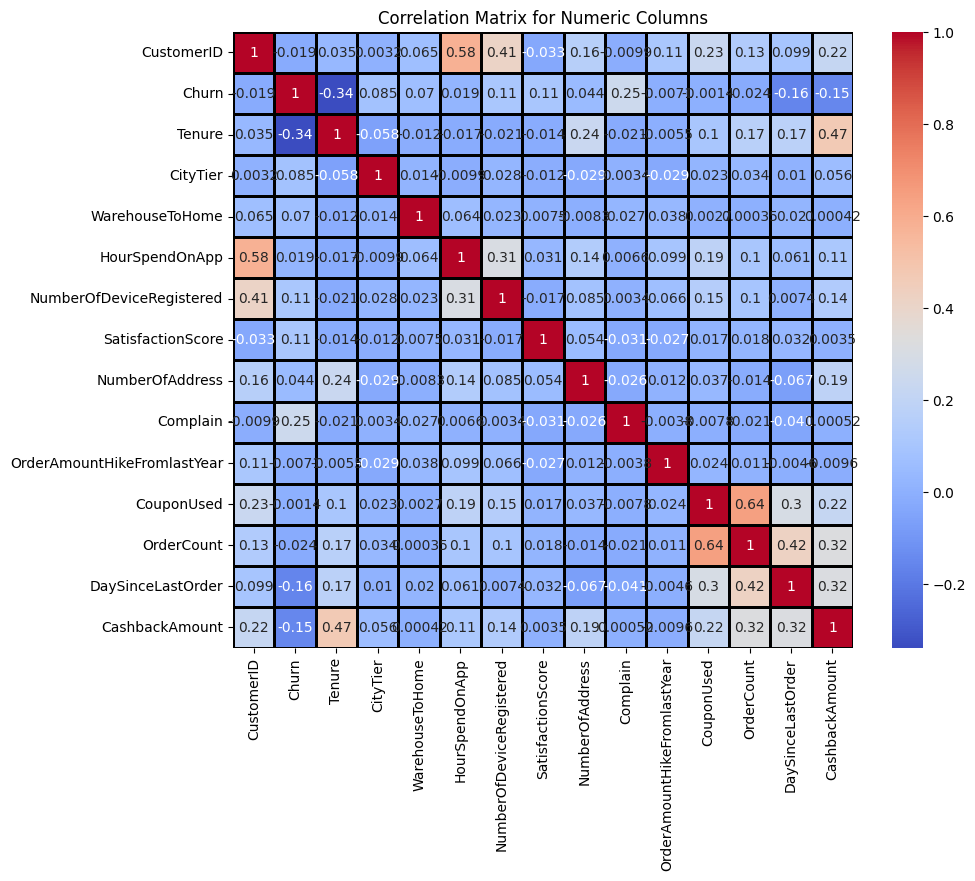

In [11]:
import seaborn as sns
numeric_df = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=2, linecolor='black')
plt.title('Correlation Matrix for Numeric Columns')
plt.show()

# Correlations between numeric variables 

* Several intresting relationships are displayed. For demonstration purpuses only higher correlations are reviewed.
* Ordercountused and cupons displays a modest correlation r=0.64 Indicating that as a customer is placing more orders they tend to use coupns. 


## Does the preferred payment mode have any correlation with customer churn?


<Figure size 1600x1000 with 0 Axes>

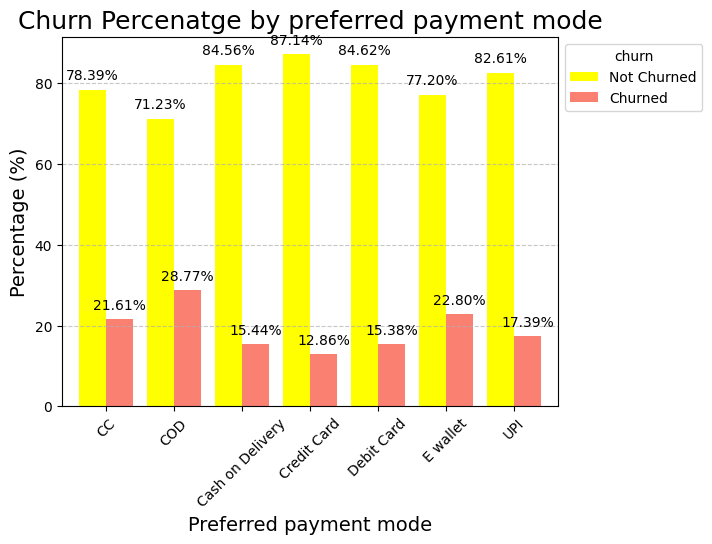

In [12]:
payment_mode_churn_percentage= pd.crosstab(df['PreferredPaymentMode'],df['Churn'],normalize='index')*100
payment_mode_churn_percentage=payment_mode_churn_percentage.round(2)

plt.figure(figsize=(16,10))
ax=payment_mode_churn_percentage.plot(kind='bar',color=['yellow','salmon'],width=0.8)
# Adding percentage values on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%',(p.get_x() + p.get_width()/2.,p.get_height()),
                ha='center',va='center',xytext=(0,10),textcoords='offset points')
    
plt.title ('Churn Percenatge by preferred payment mode',size=18)
plt.xlabel('Preferred payment mode',size=14)
plt.ylabel('Percentage (%)',size=14)
plt.xticks (rotation=45)
plt.legend(title='churn',labels=['Not Churned','Churned'],loc='upper left',bbox_to_anchor=(1,1),fontsize='medium')
plt.grid(axis='y',linestyle='--',alpha=0.7)
plt.show()

* Cash on Delivery users have the highest churn rate (24.90%), followed by E wallet users (22.80%), and UPI users (17.39%).
* Credit Card and Debit Card users exhibit lower churn rates, at 14.21% and 15.38%, respectively.


# Does gender affect churn rates?

<Figure size 2000x1600 with 0 Axes>

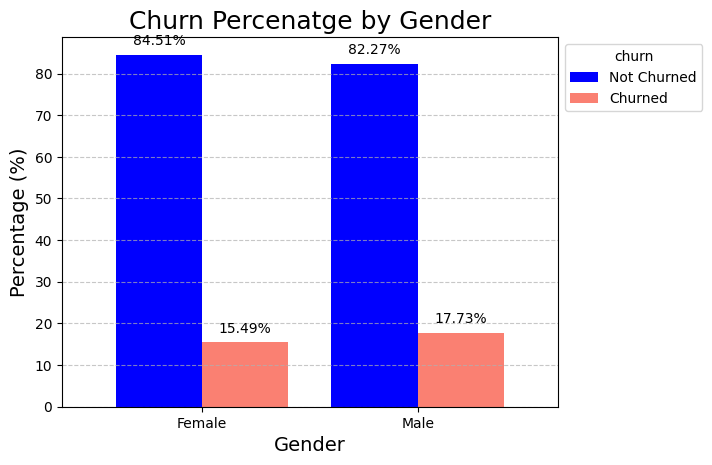

In [13]:
gender_churn_percentage= pd.crosstab(df['Gender'],df['Churn'],normalize='index')*100
gender_churn_percentage=gender_churn_percentage.round(2)

plt.figure(figsize=(20,16))
ax=gender_churn_percentage.plot(kind='bar',color=['blue','salmon'],width=0.8)
# Adding percentage values on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%',(p.get_x() + p.get_width()/2.,p.get_height()),
                ha='center',va='center',xytext=(0,10),textcoords='offset points')
    
plt.title ('Churn Percenatge by Gender',size=18)
plt.xlabel('Gender',size=14)
plt.ylabel('Percentage (%)',size=14)
plt.xticks (rotation=0)
plt.legend(title='churn',labels=['Not Churned','Churned'],loc='upper left',bbox_to_anchor=(1,1),fontsize='medium')
plt.grid(axis='y',linestyle='--',alpha=0.7)
plt.show()

These percentages indicate that there are indeed gender-based patterns in customer churn:

* Male customers have a slightly higher churn rate (17.73%) compared to female customers (15.49%).
* Female customers exhibit a higher retention rate (84.51%) than male customers (82.27%).

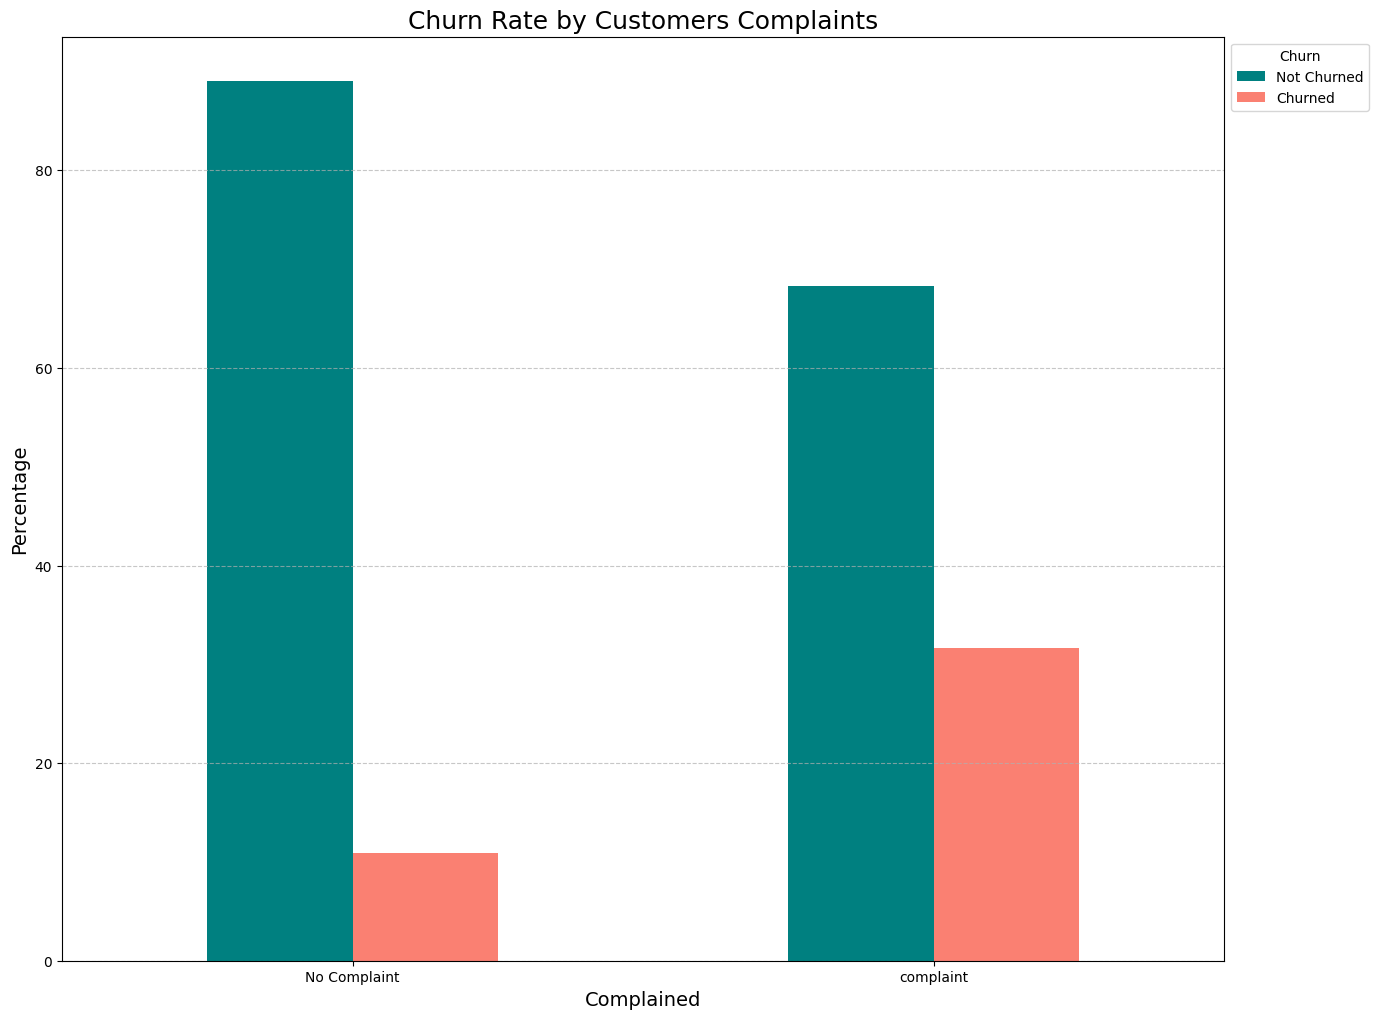

In [14]:
# Analysing the relationship between customers complain and churn rate
complaint_churn_rate=pd.crosstab(df['Complain'],df['Churn'],normalize='index')*100
complaint_churn_rate=complaint_churn_rate.round(2)

# Creating a bar plot to visualize the relationship
plt.figure(figsize=(15,12))
complaint_churn_rate.plot(kind='bar',stacked=False,color=['teal','salmon'],ax=plt.gca())
plt.title('Churn Rate by Customers Complaints',size=18)
plt.xlabel('Complained',size=14)
plt.ylabel('Percentage',size=14)
plt.xticks(ticks=[0,1],labels=['No Complaint','complaint'],rotation=0)
plt.legend(title='Churn', labels=['Not Churned','Churned'],loc='upper left',bbox_to_anchor=(1,1))
plt.grid(axis='y',linestyle='--',alpha=0.7)
plt.show()

* As expected customers who submitt complaints tend to Churn to a higher degree than customers who don't submitt a complaint


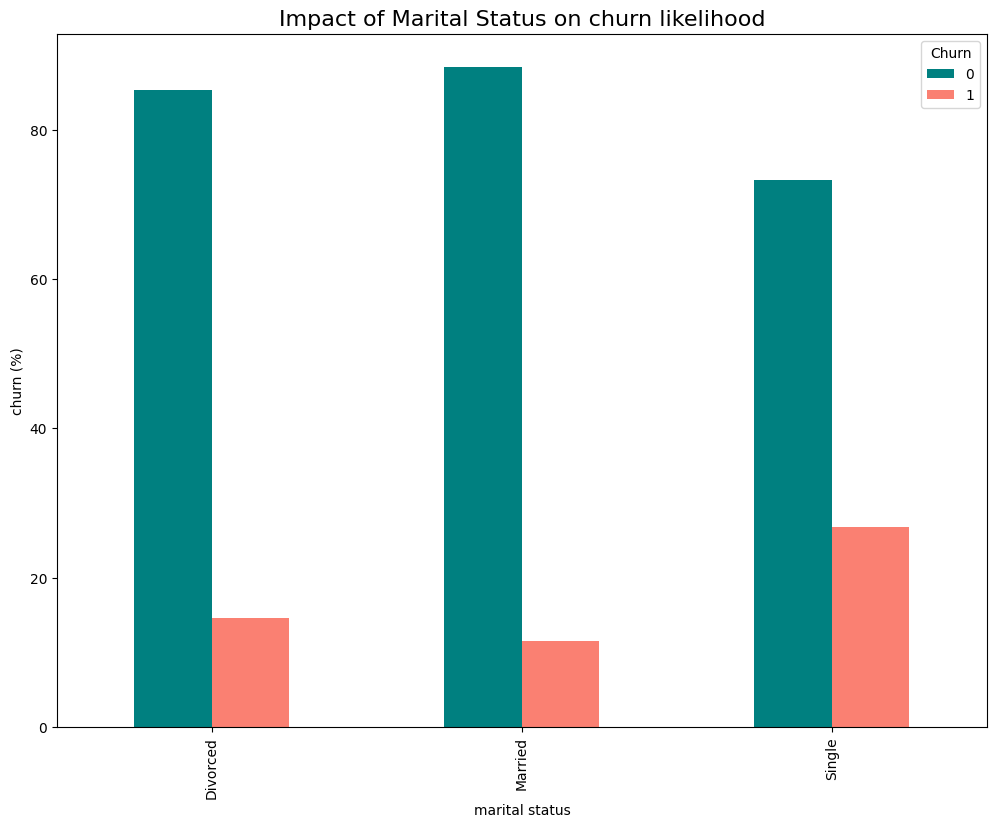

In [15]:
# calculating the churn rate for different marital statuses
marital_status_churn_rate=pd.crosstab(df['MaritalStatus'],df['Churn'],normalize='index')*100
marital_status_churn_rate=marital_status_churn_rate.round(2)
# visualize impact of marital status on the likelihood of churn
plt.figure(figsize=(12,9))
marital_status_churn_rate.plot(kind='bar',stacked=False,color=['teal','salmon'],ax=plt.gca())
plt.title('Impact of Marital Status on churn likelihood',size=16)
plt.xlabel('marital status')
plt.ylabel('churn (%)')
plt.show()

* Clients that are singel display the highest rates of churn 


In [16]:
#Creating a crosstab to analyze churn rate by the combination of gender and marital status
gender_marital_status_churn=pd.crosstab(index=[df['Gender'],df['MaritalStatus']],columns=df['Churn'],normalize='index')*100
gender_marital_status_churn=gender_marital_status_churn.round(2)
gender_marital_status_churn

Churn                     0      1
Gender MaritalStatus              
Female Divorced       86.21  13.79
       Married        90.18   9.82
       Single         75.20  24.80
Male   Divorced       84.80  15.20
       Married        87.43  12.57
       Single         71.87  28.13